In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9681655,Magistrates,LA TROBE STREET,KING STREET,WILLIAM STREET,3,3938N,16/07/2012 12:31:56 PM,16/07/2012 01:23:07 PM,3071,2P TKT A M-SAT 7:30-20:30,0,856,2143
7315421,Queensberry,DUDLEY STREET,KING STREET,WILLIAM STREET,3,7082N,05/05/2012 06:27:23 PM,05/05/2012 08:30:00 PM,7357,3P TKT A M-SAT 7:30-20:30,0,614,5197
8398335,Jolimont,ALBERT STREET,MORRISON PLACE,LANSDOWNE STREET,3,12266N,07/06/2012 02:07:21 PM,07/06/2012 02:08:56 PM,95,1/4P M-F 7:30-16:00,0,16,6369
7701214,City Square,ELIZABETH STREET,COLLINS STREET,FLINDERS LANE,2,910E,17/05/2012 04:40:18 PM,17/05/2012 05:14:10 PM,2032,1/2P M-SAT 7:30-19:30,0,627,560
2596530,RACV,BOURKE STREET,QUEEN STREET,ELIZABETH STREET,3,2384N,12/12/2011 07:30:07 AM,12/12/2011 07:32:59 AM,172,1P MTR M-SAT 7:30-19:30,0,123,1484


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
1595911,The Mac,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4,3765S,14/11/2011 04:12:29 PM,14/11/2011 04:30:14 PM,1065,1P TKT A M-F 9:30-19:30,0,856,2166
6355978,Queensberry,EADES PLACE,VICTORIA STREET,STANLEY STREET,5,6229W,04/04/2012 09:33:30 AM,04/04/2012 09:34:40 AM,70,4P RPA M-F 7:30-18:30,0,617,2485
6221801,The Mac,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,1,C6534,30/03/2012 04:03:55 PM,30/03/2012 04:09:11 PM,316,1P MTR M-SAT 7:30-19:30,0,681,2796
8866577,Princes Theatre,SPRING STREET,LONSDALE STREET,Lt BOURKE STREET,5,65W,21/06/2012 06:25:06 PM,21/06/2012 07:30:00 PM,3894,LZ 15M M-SUN 7:30-19:30,1,1288,6986
1856860,County,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3220,21/11/2011 05:38:26 PM,21/11/2011 05:55:33 PM,1027,1P MTR M-SAT 7:30-19:30,0,894,2123


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1052
Victoria Market     701
Princes Theatre     681
Regency             678
Southbank           651
The Mac             636
Hyatt               600
Titles              550
Rialto              467
City Square         428
Chinatown           421
Hardware            407
County              404
Courtney            378
Spencer             376
Banks               362
RACV                335
Magistrates         327
Jolimont            272
Supreme             192
Docklands            42
Tavistock            35
West Melbourne        5
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9681655,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,3,3938N,16/07/2012 12:31:56 PM,16/07/2012 01:23:07 PM,3071,2P TKT A M-SAT 7:30-20:30,0,856,2143
7315421,QUEENSBERRY,DUDLEY STREET,KING STREET,WILLIAM STREET,3,7082N,05/05/2012 06:27:23 PM,05/05/2012 08:30:00 PM,7357,3P TKT A M-SAT 7:30-20:30,0,614,5197
8398335,JOLIMONT,ALBERT STREET,MORRISON PLACE,LANSDOWNE STREET,3,12266N,07/06/2012 02:07:21 PM,07/06/2012 02:08:56 PM,95,1/4P M-F 7:30-16:00,0,16,6369
7701214,CITY SQUARE,ELIZABETH STREET,COLLINS STREET,FLINDERS LANE,2,910E,17/05/2012 04:40:18 PM,17/05/2012 05:14:10 PM,2032,1/2P M-SAT 7:30-19:30,0,627,560
2596530,RACV,BOURKE STREET,QUEEN STREET,ELIZABETH STREET,3,2384N,12/12/2011 07:30:07 AM,12/12/2011 07:32:59 AM,172,1P MTR M-SAT 7:30-19:30,0,123,1484


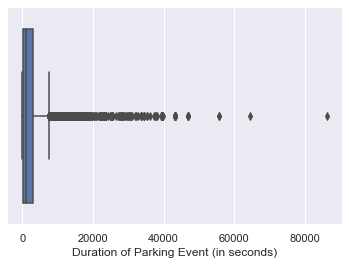

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             934
QUEEN STREET                774
LA TROBE STREET             584
EXHIBITION STREET           557
FRANKLIN STREET             532
COLLINS STREET              517
ELIZABETH STREET            497
RUSSELL STREET              489
BOURKE STREET               411
LT LONSDALE STREET          331
FLINDERS LANE               290
SPRING STREET               279
KING STREET                 276
LT COLLINS STREET           267
ERROL STREET                241
WILLIAM STREET              208
LT BOURKE STREET            178
COVENTRY STREET             170
A'BECKETT STREET            151
VICTORIA STREET             147
FLINDERS STREET             144
CAPEL STREET                130
SPENCER STREET              122
QUEENSBERRY STREET          106
GRANT STREET                 97
ALBERT STREET                92
O'CONNELL STREET             92
THERRY STREET                90
DORCAS STREET                90
KAVANAGH STREET              78
COBDEN STREET                68
LEVESON 

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            853
QUEEN STREET           817
QUEENSBERRY STREET     631
WILLIAM STREET         607
RUSSELL STREET         535
SPENCER STREET         494
SWANSTON STREET        488
EXHIBITION STREET      475
LT LONSDALE STREET     435
LONSDALE STREET        369
VICTORIA STREET        361
LT COLLINS STREET      357
COLLINS STREET         313
BOURKE STREET          268
ELIZABETH STREET       255
LT BOURKE STREET       249
FLINDERS LANE          211
LA TROBE STREET        162
WILLAM STREET          147
A'BECKETT STREET       147
THERRY STREET          142
FRANKLIN STREET        131
WELLS STREET           129
DODDS STREET           101
STURT STREET            99
SOUTHBANK BOULEVARD     87
ERROL STREET            86
O'CONNELL STREET        83
KINGS WAY               82
FLINDERS STREET         81
VICTORIA PARADE         62
BALSTON STREET          59
COBDEN STREET           59
PEEL STREET             56
HOWARD STREET           54
PELHAM STREET           50
GISBORNE STREET         46
A

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

ELIZABETH STREET       841
WILLIAM STREET         823
VICTORIA STREET        812
QUEEN STREET           743
EXHIBITION STREET      517
KING STREET            494
SPRING STREET          478
LONSDALE STREET        462
RUSSELL STREET         413
FLINDERS LANE          394
LT BOURKE STREET       369
COLLINS STREET         357
LA TROBE STREET        271
LT COLLINS STREET      268
SWANSTON STREET        255
BOURKE STREET          249
FLINDERS STREET        211
LT LONSDALE STREET     197
DODDS STREET           161
FRANKLIN STREET        142
ST KILDA ROAD          129
LANSDOWNE STREET        97
QUEENSBERRY STREET      90
LEVESON STREET          86
POWER STREET            79
A'BECKETT STREET        72
THERRY STREET           71
WALSH STREET            66
WELLS STREET            63
HAWKE STREET            61
STURT STREET            59
CAPEL STREET            46
ELM STREET              43
STANLEY STREET          42
DUDLEY STREET           39
GISBORNE STREET         36
MILTON STREET           34
K

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9681655,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,3,3938N,2012-07-16 12:31:56,2012-07-16 13:23:07,3071,2P TKT A M-SAT 7:30-20:30,0,856,2143
7315421,QUEENSBERRY,DUDLEY STREET,KING STREET,WILLIAM STREET,3,7082N,2012-05-05 18:27:23,2012-05-05 20:30:00,7357,3P TKT A M-SAT 7:30-20:30,0,614,5197
8398335,JOLIMONT,ALBERT STREET,MORRISON PLACE,LANSDOWNE STREET,3,12266N,2012-07-06 14:07:21,2012-07-06 14:08:56,95,1/4P M-F 7:30-16:00,0,16,6369
7701214,CITY SQUARE,ELIZABETH STREET,COLLINS STREET,FLINDERS LANE,2,910E,2012-05-17 16:40:18,2012-05-17 17:14:10,2032,1/2P M-SAT 7:30-19:30,0,627,560
2596530,RACV,BOURKE STREET,QUEEN STREET,ELIZABETH STREET,3,2384N,2011-12-12 07:30:07,2011-12-12 07:32:59,172,1P MTR M-SAT 7:30-19:30,0,123,1484


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
1595911,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4,3765S,2011-11-14 16:12:29,2011-11-14 16:30:14,1065,1P TKT A M-F 9:30-19:30,0,856,2166
6355978,QUEENSBERRY,EADES PLACE,VICTORIA STREET,STANLEY STREET,5,6229W,2012-04-04 09:33:30,2012-04-04 09:34:40,70,4P RPA M-F 7:30-18:30,0,617,2485
6221801,THE MAC,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,1,C6534,2012-03-30 16:03:55,2012-03-30 16:09:11,316,1P MTR M-SAT 7:30-19:30,0,681,2796
8866577,PRINCES THEATRE,SPRING STREET,LONSDALE STREET,LT BOURKE STREET,5,65W,2012-06-21 18:25:06,2012-06-21 19:30:00,3894,LZ 15M M-SUN 7:30-19:30,1,1288,6986
1856860,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3220,2011-11-21 17:38:26,2011-11-21 17:55:33,1027,1P MTR M-SAT 7:30-19:30,0,894,2123


### KNN Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

9681655     0
7315421     1
8398335     2
7701214     3
2596530     4
361205      5
10297157    6
8339941     5
693944      7
5026205     8
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
9681655,0,0,0,0,0,3,3071,856,2143,12,13
7315421,1,0,0,1,0,3,7357,614,5197,18,20
8398335,2,1,1,2,0,3,95,16,6369,14,14
7701214,3,2,2,3,0,2,2032,627,560,16,17
2596530,4,3,3,4,0,3,172,123,1484,7,7
361205,1,4,4,5,0,1,2936,192,2693,17,18
10297157,3,5,5,6,0,2,1481,1221,5758,12,12
8339941,1,6,6,7,0,1,14511,192,5279,8,12
693944,5,7,7,8,0,4,260,547,4566,15,15
5026205,6,8,8,9,0,3,699,894,1798,9,9


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 54.1min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 2
Best weights: distance
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.7756
1,auto,10,1,1,distance,0.7756
2,auto,10,1,2,uniform,0.7162
3,auto,10,1,2,distance,0.7162
4,auto,10,1,5,uniform,0.6927
5,auto,10,1,5,distance,0.6927
6,auto,10,2,1,uniform,0.7404
7,auto,10,2,1,distance,0.7757
8,auto,10,2,2,uniform,0.6888
9,auto,10,2,2,distance,0.7162


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.253
Score with 2 selected features: 0.739
Score with 3 selected features: 0.745
Score with 4 selected features: 0.8885
Score with 5 selected features: 0.9925
Score with 6 selected features: 0.993
Score with 7 selected features: 0.993

Indexs of the desired features
[2, 3, 1, 0, 7, 10, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,Between Street 1,Area Name,Street ID,Departure Hour,Side Of Street
9681655,0,0,0,0,856,13,3
7315421,0,1,0,1,614,20,3
8398335,1,2,1,2,16,14,3
7701214,2,3,2,3,627,17,2
2596530,3,4,3,4,123,7,3
361205,4,5,4,1,192,18,1
10297157,5,6,5,3,1221,12,2
8339941,6,7,6,1,192,12,1
693944,7,8,7,5,547,15,4
5026205,8,9,8,6,894,9,3


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 38.7min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 4,
 'p': 1,
 'weights': 'distance'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 4
Best weights: distance
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.9922
1,auto,10,1,1,distance,0.9922
2,auto,10,1,2,uniform,0.9886
3,auto,10,1,2,distance,0.9886
4,auto,10,1,5,uniform,0.9862
5,auto,10,1,5,distance,0.9862
6,auto,10,2,1,uniform,0.9857
7,auto,10,2,1,distance,0.9922
8,auto,10,2,2,uniform,0.9814
9,auto,10,2,2,distance,0.9886


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[296   0   0 ...   0   0   0]
 [  0  15   0 ...   0   0   0]
 [  0   0  49 ...   0   0   0]
 ...
 [  0   0   0 ...   7   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   2]]

[Train/test split] score: 0.98800


In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.99150
[fold 1] score: 0.99150
[fold 2] score: 0.99450
[fold 3] score: 0.99650
[fold 4] score: 0.99250

KNN mean score [5 folds] = 0.9933
